In [247]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit_textbook.tools import array_to_latex
import numpy as np

In [248]:
def encode_message(message, qc, alice_qubit):
    if message != "00":
        if message == "01":
            qc.x(alice_qubit)
        elif message == "10":
            qc.z(alice_qubit)
        else:
            qc.x(alice_qubit)
            qc.z(alice_qubit)
    qc.barrier()

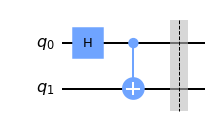

In [249]:
#Third party gives Alice and Bob a pair of entangled qubits
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.barrier()
qc.draw(output='mpl')

In [250]:
array_to_latex(execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector())

<IPython.core.display.Math object>

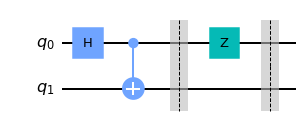

In [251]:
#Alice encodes the message into the circuit
message = '10'
encode_message(message, qc, 0)
qc.draw(output='mpl')

In [252]:
array_to_latex(execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector())

<IPython.core.display.Math object>

In [253]:
#Bob simply applies a "restoration" procedure -> a CNOT and then a Hadamard gate
qc.cx(0,1)
array_to_latex(execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector())

<IPython.core.display.Math object>

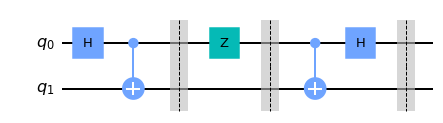

In [254]:
qc.h(0)
qc.barrier()
qc.draw(output='mpl')

In [255]:
array_to_latex(execute(qc, Aer.get_backend('statevector_simulator')).result().get_statevector())

<IPython.core.display.Math object>

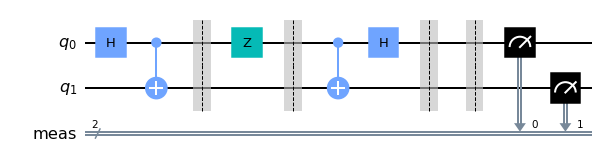

In [256]:
# qc.measure(0,1)
# qc.measure(1,0)
qc.measure_all()
qc.draw(output='mpl')

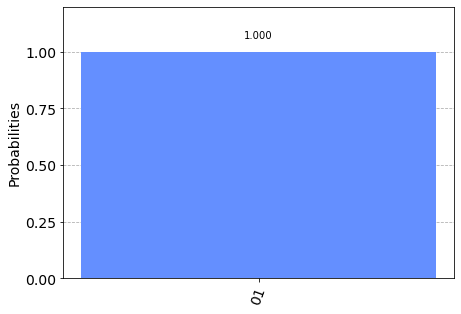

In [257]:
result = execute(qc, Aer.get_backend('qasm_simulator')).result()
counts = result.get_counts()
plot_histogram(counts)